# Stroke Prediction Modeling with SVM and SMOTE

### Import Datasets

In [1]:
import pandas as pd
import numpy as np

#import raw, scaled, norm datasets
stroke_raw_df = pd.read_csv('stroke_raw_df.csv',index_col=0)
stroke_norm_df = pd.read_csv('stroke_norm_df.csv',index_col=0)
stroke_scaled_df = pd.read_csv('stroke_scaled_df.csv',index_col=0)

stroke_raw_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,33.2,1,0,0,1,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,1,0


In [2]:
stroke_norm_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,0.736842,0,1,1,1,0.801173,0.313507,1,0,1,0,0,1,0,0
1,51676,0,0.631579,0,0,1,0,0.678875,0.271375,1,0,0,1,0,0,1,0
2,31112,1,0.964912,0,1,1,0,0.234159,0.262701,1,0,1,0,0,0,1,0
3,60182,0,0.421053,0,0,1,1,0.535793,0.286245,1,0,1,0,0,0,0,1
4,1665,0,0.947368,1,0,1,0,0.549141,0.157373,1,0,0,1,0,0,1,0


In [3]:
stroke_scaled_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,0.874738,0,1,1,1,2.464581,0.819354,1,0,1,0,0,1,0,0
1,51676,0,0.499979,0,0,1,0,1.918619,0.342896,1,0,0,1,0,0,1,0
2,31112,1,1.686716,0,1,1,0,-0.066679,0.244801,1,0,1,0,0,0,1,0
3,60182,0,-0.249538,0,0,1,1,1.279876,0.511058,1,0,1,0,0,0,0,1
4,1665,0,1.624256,1,0,1,0,1.339462,-0.946345,1,0,0,1,0,0,1,0


### Train and test data

In [4]:
from sklearn.model_selection import train_test_split

#Raw dataset

X_raw = stroke_raw_df.drop(['stroke','id'], axis=1)
y_raw = stroke_raw_df['stroke']

# Split into training and test set
X_raw_train, X_raw_test, y_raw_train, y_raw_test = train_test_split(X_raw, y_raw, test_size = 0.4, random_state=42, 
                                                                                                    stratify=y_raw)

In [5]:
#Normed dataset

X_norm = stroke_norm_df.drop(['stroke','id'], axis=1)
y_norm = stroke_norm_df['stroke']

# Split into training and test set
X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(X_norm, y_norm, test_size = 0.4,
                                                                        random_state=42, stratify=y_norm)

In [6]:
#Scaled dataset

X_scaled = stroke_scaled_df.drop(['stroke','id'], axis=1)
y_scaled = stroke_scaled_df['stroke']

# Split into training and test set
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled, y_scaled, test_size = 0.4, 
                                                                                random_state=42, stratify=y_scaled)

### Resampling

#### Without using any resampling strategy, we see that the model used is poor. No stroke victims are identified. This was the same for the raw, scaled, and normed data. 

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

model_svm = SVC(kernel='linear')
model_svm.fit(X_raw_train,y_raw_train)
y_pred = model_svm.predict(X_raw_test)

print(classification_report(y_raw_test, y_pred))
print(confusion_matrix(y_raw_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      1397
           1       0.00      0.00      0.00        99

    accuracy                           0.93      1496
   macro avg       0.47      0.50      0.48      1496
weighted avg       0.87      0.93      0.90      1496

[[1397    0]
 [  99    0]]


/Users/yewandetaiwo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yewandetaiwo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yewandetaiwo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

### Using SMOTEEN with SVM to see how well the model does. The model does pretty well, but then I wanted to use SVMSMOTE to see the difference. 

In [14]:
from imblearn.combine import SMOTEENN 
from sklearn.metrics import balanced_accuracy_score

smote = SMOTEENN(random_state=101)

X_oversample_svm, y_oversample_svm = smote.fit_resample(X_norm_train, y_norm_train)

classifier_svm = SVC(kernel='linear',class_weight='balanced')
classifier_svm.fit(X_oversample_svm, y_oversample_svm)

y_pred = classifier_svm.predict(X_norm_test)
y_train_pred = classifier_svm.predict(X_norm_train)

print("Test data balanced accuracy: "+ str(balanced_accuracy_score(y_norm_test,y_pred)))
print("Train data balanced accuracy: "+ str(balanced_accuracy_score(y_norm_train,y_train_pred)))

print(classification_report(y_norm_test, y_pred))
print(confusion_matrix(y_norm_test, y_pred))

Test data balanced accuracy: 0.7215859381213712
Train data balanced accuracy: 0.7110566870595525
              precision    recall  f1-score   support

           0       0.97      0.71      0.82      1397
           1       0.15      0.74      0.25        99

    accuracy                           0.71      1496
   macro avg       0.56      0.72      0.53      1496
weighted avg       0.92      0.71      0.78      1496

[[986 411]
 [ 26  73]]


### Using SVMSMOTE because it's a technique that incorporates the SVM model. We wanted to see how this would work with the SVM model. 

In [15]:
from imblearn.over_sampling import SVMSMOTE

svmsmote = SVMSMOTE(random_state = 101,k_neighbors=5,n_jobs=-1)

X_oversample_svm, y_oversample_svm = svmsmote.fit_resample(X_norm_train, y_norm_train)
classifier_svm = SVC(kernel='linear',class_weight='balanced')
classifier_svm.fit(X_oversample_svm, y_oversample_svm)

y_pred = classifier_svm.predict(X_norm_test)
y_train_pred = classifier_svm.predict(X_norm_train)

print("Test data balanced accuracy: "+ str(balanced_accuracy_score(y_norm_test,y_pred)))
print("Train data balanced accuracy: "+ str(balanced_accuracy_score(y_norm_train,y_train_pred)))

print(classification_report(y_norm_test, y_pred))
print(confusion_matrix(y_norm_test, y_pred))

Test data balanced accuracy: 0.7625864948699594
Train data balanced accuracy: 0.7256221120834301
              precision    recall  f1-score   support

           0       0.98      0.74      0.84      1397
           1       0.18      0.79      0.29        99

    accuracy                           0.74      1496
   macro avg       0.58      0.76      0.56      1496
weighted avg       0.93      0.74      0.80      1496

[[1030  367]
 [  21   78]]


(<Figure size 432x288 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.9291776412057361, 0.7348447194629213),
  ('0', '1'): (0.0,
   0.7381669785991338,
   0.9291776412057361,
   0.26183302140086606),
  ('1', '0'): (0.9341527655838456,
   0.0,
   0.06584723441615452,
   0.2114164904862579),
  ('1', '1'): (0.9341527655838456,
   0.21473874962247053,
   0.06584723441615452,
   0.7852612503775294)})

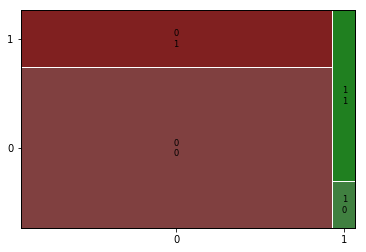

In [17]:
conf_matrix = confusion_matrix(y_norm_test, y_pred)
from statsmodels.graphics.mosaicplot import mosaic
mosaic(conf_matrix)

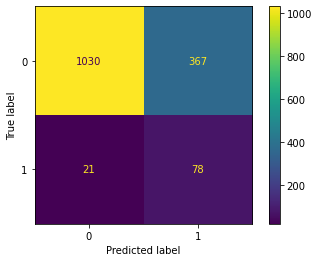

In [19]:
plot_confusion_matrix(classifier_svm, X_norm_test, y_norm_test)

#### We can see that the SVM-SMOTE model works well together. It does a better job of predicting the true positives than the other models. It also has a high recall for the '1' predictive label. 